# Mathematical Modeling

Welcome! Whether you're an expert or just curious, I'm excited to delve into the world of mathematical modeling with you. Let's explore the basics and then dive into more complex concepts.

## What is Mathematical Modeling?

Mathematical modeling is the process of representing real-world problems with mathematical equations or terms. It allows us to analyze and understand various phenomena using mathematical tools. For more detailed information, check out these resources: [MathsCareers](https://www.mathscareers.org.uk/what-is-mathematical-modelling/), [Wikipedia](https://en.wikipedia.org/wiki/Mathematical_model).

## How Are They Represented?

You might be familiar with the simple linear equation \( y = mx + c \), which represents the relationship between a dependent variable \( y \) and an independent variable \( x \). Here, \( m \) is the slope or gradient, and \( c \) is the intercept of the graph. For a refresher on linear equations, check out these resources: [Cuemath](https://www.cuemath.com/geometry/y-mx-c/), [Third Space Learning](https://thirdspacelearning.com/gcse-maths/algebra/y-mx-c/).

### A More Complex Example - Nonlinear Regression

Nonlinear regression involves modeling observational data with a function that is a nonlinear combination of model parameters. Unlike linear regression, which uses a straight-line equation, nonlinear regression utilizes a curve to show associations, making it nonlinear in parameters. The goal, similar to linear regression, is to minimize the sum of squares of differences between observed and predicted values. Nonlinear regression can employ various functions such as logarithmic, trigonometric, or exponential functions, but it often involves iterative approximations, making model development more complex. One practical application is predicting population growth over time, where a nonlinear relationship exists between time and population growth.

For more information, refer to: [Wikipedia](https://en.wikipedia.org/wiki/Nonlinear_regression), [Corporate Finance Institute](https://corporatefinanceinstitute.com/resources/data-science/nonlinear-regression/), [Investopedia](https://www.investopedia.com/terms/n/nonlinear-regression.asp).

### Maxwell Model Example

The Maxwell Model describes the behavior of viscoelastic materials by combining purely viscous and elastic components in series. Proposed by James Clerk Maxwell in 1867, this model is represented by stress–strain relationships in a viscous damper:


$σ = σ_{D} ​+ σ_{S} \\
​
ϵ = ϵ_{D} ​= ϵ_{S​}$

The total stress is σ  and strain ϵ are defined as the sum of stresses and strains in the damper and spring, respectively. 

The real-world application of the Maxwell Model can be seen in predicting stress relaxation data, where relaxation moduli $E_{1}, E_{2}, E_{3}$ and relaxation times  $T_{1}, T_{2}, T_{3}$ are determined by fitting experimental data to the Maxwell equation.

$E(t)= E_{e}+ E_{1} e^{-\frac{t}{T_{1}}}+ E_{2}e^{-\frac{t}{T_{2}}})  + E_{3} e^{-\frac{t}{T_{3}}});  \\
σ(t)= ε_{o} E(t) $         	


For more information, refer to this [research paper](https://www.researchgate.net/publication/248130022_Characterization_of_the_Viscoelasticity_of_Molding_Compounds_in_the_Time_Domain).

### Objective
Find the parameters of elaxation moduli $E_{1}, E_{2}, E_{3}$ and relaxation times  $T_{1}, T_{2}, T_{3}$  by fitting experimental data to the Maxwell equation.



In [1]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import curvefitting library
from scipy.optimize import curve_fit
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error

## Know Your Data (KYC)
So our data comes in form an excel sheet. Each sheet of the excel consist of a sample results and we have 30 sheets.
The time steps of our data is too small, so we need to decimate it into a more reasonable time.


### Import data

In [3]:
# Import Data
raw_data = pd.read_excel('experiment_data.xlsx', [i for i in range(1,31)])
raw_data[1].head()

,Time sec,Compressive stress MPa,Compressive strain %
0,0.0,0.028771,0.000000
1,0.1,0.029793,0.055306
2,0.2,0.032068,0.131632
3,0.3,0.033547,0.199182
4,0.4,0.034817,0.266529


###  Decimating Data

In [5]:
def sample_rate(arr, step):
    size = 3000
    for i in range(0, size, step):
        yield arr[i]
    

def sample_rate2(arr, step):
    size = 1800
    for i in range(0, size, step):
        yield arr[i]

# we are doing this because some sampeles end time are different

In [7]:
# for i in range(1, 16):
dict1 = {
    
}

# # second sammpliing rate
for i in range(1, 4):

    stress_sample =  [stress for stress in 
                    sample_rate2(raw_data[i]['Compressive stress MPa'], 6 )]
    dict1[f'stress{i}'] = (stress_sample)

for i in range(4, 31):

    stress_sample =  [stress for stress in 
                    sample_rate(raw_data[i].iloc[:,1], 10 )]
    dict1[f'stress{i}'] = (stress_sample)
    



# strain 


    

# # second sammpliing rate
for i in range(1, 4):

    strain_sample =  [strain for strain in 
                    sample_rate2(raw_data[i]['Compressive strain %'], 6 )]
    dict1[f'strain{i}'] = (strain_sample)


for i in range(4, 31):

    strain_sample =  [strain for strain in 
                    sample_rate(raw_data[i].iloc[:,2], 10 )]
    dict1[f'strain{i}'] = (strain_sample)

### Dataframe

In [ ]:
stress_df = pd.DataFrame(dict1)
stress_df

,stress1,stress2,stress3,stress4,stress5,stress6,stress7,stress8,stress9,stress10,...,strain21,strain22,strain23,strain24,strain25,strain26,strain27,strain28,strain29,strain30
0,0.028771,0.022082,0.008885,0.009875,0.052017,0.019685,0.010866,0.005191,0.036776,0.026118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.036969,0.028912,0.017365,0.015461,0.067505,0.027440,0.019348,0.007692,0.047912,0.037008,...,0.833157,0.656117,0.724706,0.708069,1.040808,0.555098,1.387319,1.389445,0.725150,1.111216
2,0.041987,0.032926,0.024262,0.019203,0.075876,0.031785,0.026072,0.009217,0.053481,0.044100,...,1.667589,1.323051,1.448746,1.432553,2.082254,1.111726,2.778464,2.776338,1.448524,2.221071
3,0.046241,0.036401,0.031641,0.023302,0.082693,0.036076,0.033508,0.010768,0.057975,0.051375,...,2.499470,1.989372,2.173674,2.158590,3.124975,1.666823,4.165783,4.166633,2.173896,3.330926
4,0.050409,0.039810,0.039670,0.028028,0.089179,0.040631,0.041466,0.012388,0.062207,0.059174,...,3.334412,2.655081,2.897714,2.882186,4.167696,2.222601,5.555228,5.554378,2.897936,4.443502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.093173,0.077486,0.098081,0.056015,0.113267,0.060062,0.091835,0.019933,0.086351,0.121721,...,9.999920,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260
296,0.093163,0.077456,0.098050,0.055997,0.113238,0.060050,0.091807,0.019936,0.086329,0.121695,...,9.999920,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260
297,0.093121,0.077428,0.098013,0.055975,0.113208,0.060044,0.091794,0.019932,0.086304,0.121680,...,9.999920,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260
298,0.093090,0.077397,0.097990,0.055961,0.113184,0.060039,0.091779,0.019914,0.086279,0.121653,...,9.999920,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260


In [9]:
stress_df.columns

Index(['stress1', 'stress2', 'stress3', 'stress4', 'stress5', 'stress6',
       'stress7', 'stress8', 'stress9', 'stress10', 'stress11', 'stress12',
       'stress13', 'stress14', 'stress15', 'stress16', 'stress17', 'stress18',
       'stress19', 'stress20', 'stress21', 'stress22', 'stress23', 'stress24',
       'stress25', 'stress26', 'stress27', 'stress28', 'stress29', 'stress30',
       'strain1', 'strain2', 'strain3', 'strain4', 'strain5', 'strain6',
       'strain7', 'strain8', 'strain9', 'strain10', 'strain11', 'strain12',
       'strain13', 'strain14', 'strain15', 'strain16', 'strain17', 'strain18',
       'strain19', 'strain20', 'strain21', 'strain22', 'strain23', 'strain24',
       'strain25', 'strain26', 'strain27', 'strain28', 'strain29', 'strain30'],
      dtype='object')

In [10]:
# You might want to find the averages and store it
average_stress = np.mean(stress_df.iloc[:,0:30], axis=1)

# finding average strain
average_strain = np.mean(stress_df.iloc[:, 30:], axis = 1)
average_strain

avg = pd.DataFrame({'average_stress' : average_stress, 'strain': average_strain}) 
avg.to_csv("avg_stress_strain.csv")


In [11]:
# we can create a column for the average
stress_df['avg'] = np.mean(stress_df, axis=1)
stress_df

,stress1,stress2,stress3,stress4,stress5,stress6,stress7,stress8,stress9,stress10,...,strain22,strain23,strain24,strain25,strain26,strain27,strain28,strain29,strain30,avg
0,0.028771,0.022082,0.008885,0.009875,0.052017,0.019685,0.010866,0.005191,0.036776,0.026118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009323
1,0.036969,0.028912,0.017365,0.015461,0.067505,0.027440,0.019348,0.007692,0.047912,0.037008,...,0.656117,0.724706,0.708069,1.040808,0.555098,1.387319,1.389445,0.725150,1.111216,0.409308
2,0.041987,0.032926,0.024262,0.019203,0.075876,0.031785,0.026072,0.009217,0.053481,0.044100,...,1.323051,1.448746,1.432553,2.082254,1.111726,2.778464,2.776338,1.448524,2.221071,0.810669
3,0.046241,0.036401,0.031641,0.023302,0.082693,0.036076,0.033508,0.010768,0.057975,0.051375,...,1.989372,2.173674,2.158590,3.124975,1.666823,4.165783,4.166633,2.173896,3.330926,1.212083
4,0.050409,0.039810,0.039670,0.028028,0.089179,0.040631,0.041466,0.012388,0.062207,0.059174,...,2.655081,2.897714,2.882186,4.167696,2.222601,5.555228,5.554378,2.897936,4.443502,1.613749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.093173,0.077486,0.098081,0.056015,0.113267,0.060062,0.091835,0.019933,0.086351,0.121721,...,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260,5.031250
296,0.093163,0.077456,0.098050,0.055997,0.113238,0.060050,0.091807,0.019936,0.086329,0.121695,...,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260,5.031240
297,0.093121,0.077428,0.098013,0.055975,0.113208,0.060044,0.091794,0.019932,0.086304,0.121680,...,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260,5.031231
298,0.093090,0.077397,0.097990,0.055961,0.113184,0.060039,0.091779,0.019914,0.086279,0.121653,...,9.999920,10.000140,9.999920,9.999921,9.999920,10.000350,10.000350,10.000140,10.000260,5.031223


In [12]:
# Now lets define the variable name for our maodel parameter
viscoelastic_parameter = {'equil_modulus': [], 'elastic_modulus_1': [], 'elastic_modulus_2':[], 
'elastic_modulus_3' : [], 'relax_time_1':[], 'relax_time_2':[], 'relax_time_3':[], 'r_square':[]}
viscoelastic_parameter


{'equil_modulus': [],
 'elastic_modulus_1': [],
 'elastic_modulus_2': [],
 'elastic_modulus_3': [],
 'relax_time_1': [],
 'relax_time_2': [],
 'relax_time_3': [],
 'r_square': []}

### Model Fitting


C:\Users\Ademola Aina\AppData\Local\Temp\ipykernel_21784\3427863138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress_temp['time'] = np.arange(0,stop)
C:\Users\Ademola Aina\AppData\Local\Temp\ipykernel_21784\3427863138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stress_temp['time'] = np.arange(0,stop)
C:\Users\Ademola Aina\AppData\Local\Temp\ipykernel_21784\3427863138.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

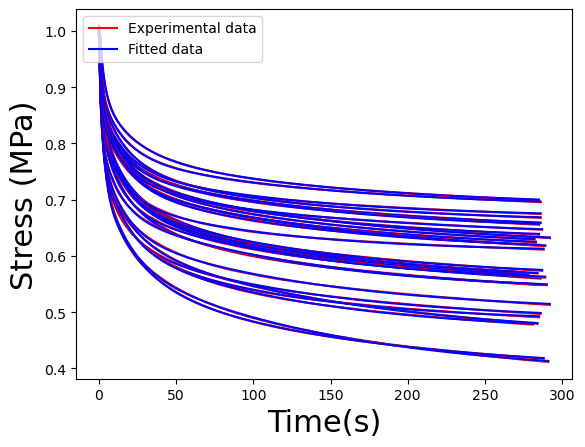

In [13]:
# using a for loop to solve our problem at once
for i in range(1, 31):
    # Find the maximum stress
    max = stress_df[stress_df[f'stress{i}'] == stress_df[f'stress{i}'].max()]
    # find the index or location of the value
    max_index = int(max.index[0])
    
    # moving needed datapoint into new df
    stress_temp = stress_df.iloc[max_index:]
    stop = len(stress_temp)
    # the time will be the lenght or the number of datapoints we have
    stress_temp['time'] = np.arange(0,stop)
    stress_temp = stress_temp[['time', f'stress{i}', f'strain{i}']]
    # Normalise stress
    stress_temp['normalize_stress'] = stress_temp.loc[:, f'stress{i}'] / stress_temp.iloc[0, 1]
    # display(stress_temp)

    # model function
    def three_element(X, equil_modulus, elastic_modulus_1, elastic_modulus_2, elastic_modulus_3, relax_time_1, relax_time_2, relax_time_3 ):
        strain = X[f'strain{i}']
        time = X['time']
        stress_history =  equil_modulus + (elastic_modulus_1*np.exp(-time/relax_time_1)) + (elastic_modulus_2 * np.exp(-time/relax_time_2)) + (elastic_modulus_3 * np.exp(-time/relax_time_3))
        stress = strain * stress_history
        return stress

    #curve fitting
    popt, pcov = curve_fit(three_element, stress_temp[['time', f'strain{i}']], stress_temp['normalize_stress'],
     p0=[5.68982783e-02, 1.65654503e-02, 1.23811135e-02, 1.75705192e-02, 6.27946828e+00, 3.46921171e+01, 2.29340519e+02]
    )

    

    # Append parameter values
    viscoelastic_parameter['equil_modulus'].append(popt[0])
    viscoelastic_parameter['elastic_modulus_1'].append(popt[1])
    viscoelastic_parameter['elastic_modulus_2'].append(popt[2])
    viscoelastic_parameter['elastic_modulus_3'].append(popt[3])
    viscoelastic_parameter['relax_time_1'].append(popt[4])
    viscoelastic_parameter['relax_time_2'].append(popt[5])
    viscoelastic_parameter['relax_time_3'].append(popt[6])


    # evaluate moodel
    max_model = three_element(stress_temp[['time', f'strain{i}']], *popt)

    #fitt the model 
    plt.plot( stress_temp['time'], stress_temp['normalize_stress'], 'r' )



    plt.plot( stress_temp['time'], max_model, 'b')
    plt.xlabel('Time(s)', fontsize=22)
    plt.legend(['Experimental data', 'Fitted data'], loc=2)
    plt.ylabel('Stress (MPa)', fontsize=22)
    plt.xticks = 25
    plt.yticks = 25

    # R-squared calculation
    r_square = r2_score(stress_temp['normalize_stress'], max_model)
    viscoelastic_parameter['r_square'].append(r_square)

    
    

### Model Paramters

In [15]:
viscoelastic_params_df = pd.DataFrame(viscoelastic_parameter)
viscoelastic_params_df['instant_modulus'] = viscoelastic_params_df['equil_modulus'] + viscoelastic_params_df['elastic_modulus_1'] + viscoelastic_params_df['elastic_modulus_2'] + viscoelastic_params_df['elastic_modulus_3']  
viscoelastic_params_df['viscous_coefficient_1'] = viscoelastic_params_df['elastic_modulus_1'] * viscoelastic_params_df['relax_time_1']
viscoelastic_params_df['viscous_coefficient_2'] = viscoelastic_params_df['elastic_modulus_2'] * viscoelastic_params_df['relax_time_2']
viscoelastic_params_df['viscous_coeffient_3'] = viscoelastic_params_df['elastic_modulus_3'] * viscoelastic_params_df['relax_time_3']
  

viscoelastic_params_df

,equil_modulus,elastic_modulus_1,elastic_modulus_2,elastic_modulus_3,relax_time_1,relax_time_2,relax_time_3,r_square,instant_modulus,viscous_coefficient_1,viscous_coefficient_2,viscous_coeffient_3
0,0.055260,0.015174,0.014607,0.014744,1.803597,14.115063,112.759932,0.999820,0.099785,0.027368,0.206181,1.662520
1,0.055537,0.014400,0.014444,0.015435,1.947743,15.147692,122.347267,0.999853,0.099816,0.028047,0.218793,1.888449
2,0.055359,0.013548,0.014692,0.016196,1.404284,13.590579,112.748861,0.999776,0.099795,0.019025,0.199673,1.826116
3,0.055021,0.020687,0.014853,0.013745,2.559157,19.267035,145.327519,0.999689,0.104306,0.052941,0.286171,1.997527
4,0.061187,0.013249,0.012800,0.012408,1.595315,14.644844,127.232352,0.999634,0.099644,0.021136,0.187456,1.578675
5,0.063285,0.019121,0.013646,0.009237,2.364669,19.510298,154.946716,0.999564,0.105289,0.045214,0.266234,1.431258
6,0.066746,0.013774,0.011707,0.009079,1.620249,15.697811,118.638950,0.999575,0.101306,0.022318,0.183776,1.077153
7,0.064598,0.013658,0.012128,0.010927,1.628741,14.762387,135.983613,0.999647,0.101311,0.022246,0.179033,1.485943
8,0.061392,0.016842,0.011857,0.012345,2.351157,17.443766,138.256817,0.999810,0.102437,0.039599,0.206839,1.706840
9,0.060693,0.015446,0.013952,0.009694,1.103301,13.656342,102.611834,0.999417,0.099785,0.017042,0.190532,0.994747


### Model Statistical Summary

In [16]:
stat_summary = viscoelastic_params_df.agg(['mean', 'std', 'max', 'min'])
stat_summary

,equil_modulus,elastic_modulus_1,elastic_modulus_2,elastic_modulus_3,relax_time_1,relax_time_2,relax_time_3,r_square,instant_modulus,viscous_coefficient_1,viscous_coefficient_2,viscous_coeffient_3
mean,0.056661,0.016879,0.013967,0.013495,1.686633,15.459320,130.117873,0.999640,0.101002,0.029102,0.216063,1.759659
std,0.008015,0.004837,0.001852,0.002846,0.444861,2.278871,12.631183,0.000122,0.001903,0.013613,0.045530,0.430577
max,0.068688,0.031261,0.017221,0.021154,2.729072,21.731823,154.946716,0.999853,0.105308,0.073085,0.373431,2.967897
min,0.038662,0.010115,0.010485,0.009079,0.920995,11.509074,102.611834,0.999345,0.099560,0.012624,0.146105,0.994747


In [17]:
# You might want save your results
stat_summary.to_csv('viscoelastic_bottom_summary.csv')
viscoelastic_params_df.to_csv('viscoelastic_param_bottom1.csv')


# Conclusion

Mathematical modeling provides a robust framework for understanding and analyzing real-world phenomena. From the simplicity of linear regression capturing straightforward relationships, to the complexity of nonlinear regression encapsulating intricate dynamics, the applications are both vast and varied.

I strongly encourage you to delve deeper into these concepts and apply them in your own projects or research endeavors. The power of mathematical modeling lies in its applicability across various domains, and its potential to reveal hidden patterns and relationships.

Should you require any clarification on the code, or if you have ideas on how to enhance this notebook, please feel free to reach out to me. You can contact me at  via my `X` handle [`@ace_ade`](https://twitter.com/ace_ade). I look forward to hearing from you and am open to constructive feedback.

